In [1]:
#カレンダーの日時の選択
    html.Div([
        html.H3('Enter a stock symbol:'),
        dcc.Input(
            id ='my_ticker_symbol',
            value='AAPL',# 初期値を設定
            style={'fontSize':24, 'width':75} #スタイルを追加
        )
    ],style={'display':'inline-block','verticalAlign':'top'}),

IndentationError: unexpected indent (Temp/ipykernel_29192/644526649.py, line 2)

In [2]:
#import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas_datareader.data as web
from datetime import datetime

C:\Users\81803\AppData\Local\Temp/ipykernel_29192/183864829.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\81803\AppData\Local\Temp/ipykernel_29192/183864829.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


ModuleNotFoundError: No module named 'pandas_datareader'

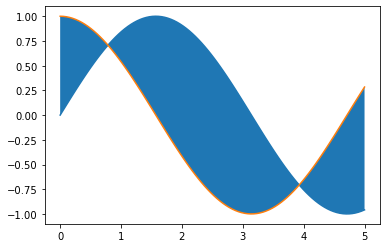

In [4]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 5, 100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1)
plt.plot(x, y2)
plt.fill_between(x, y1, y2)
plt.show()

In [28]:
!pip install psychrochart

C:\Users\81803\anaconda3\lib\site-packages\psychrochart\chart.py:533: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = self.figure.gca(position=position)


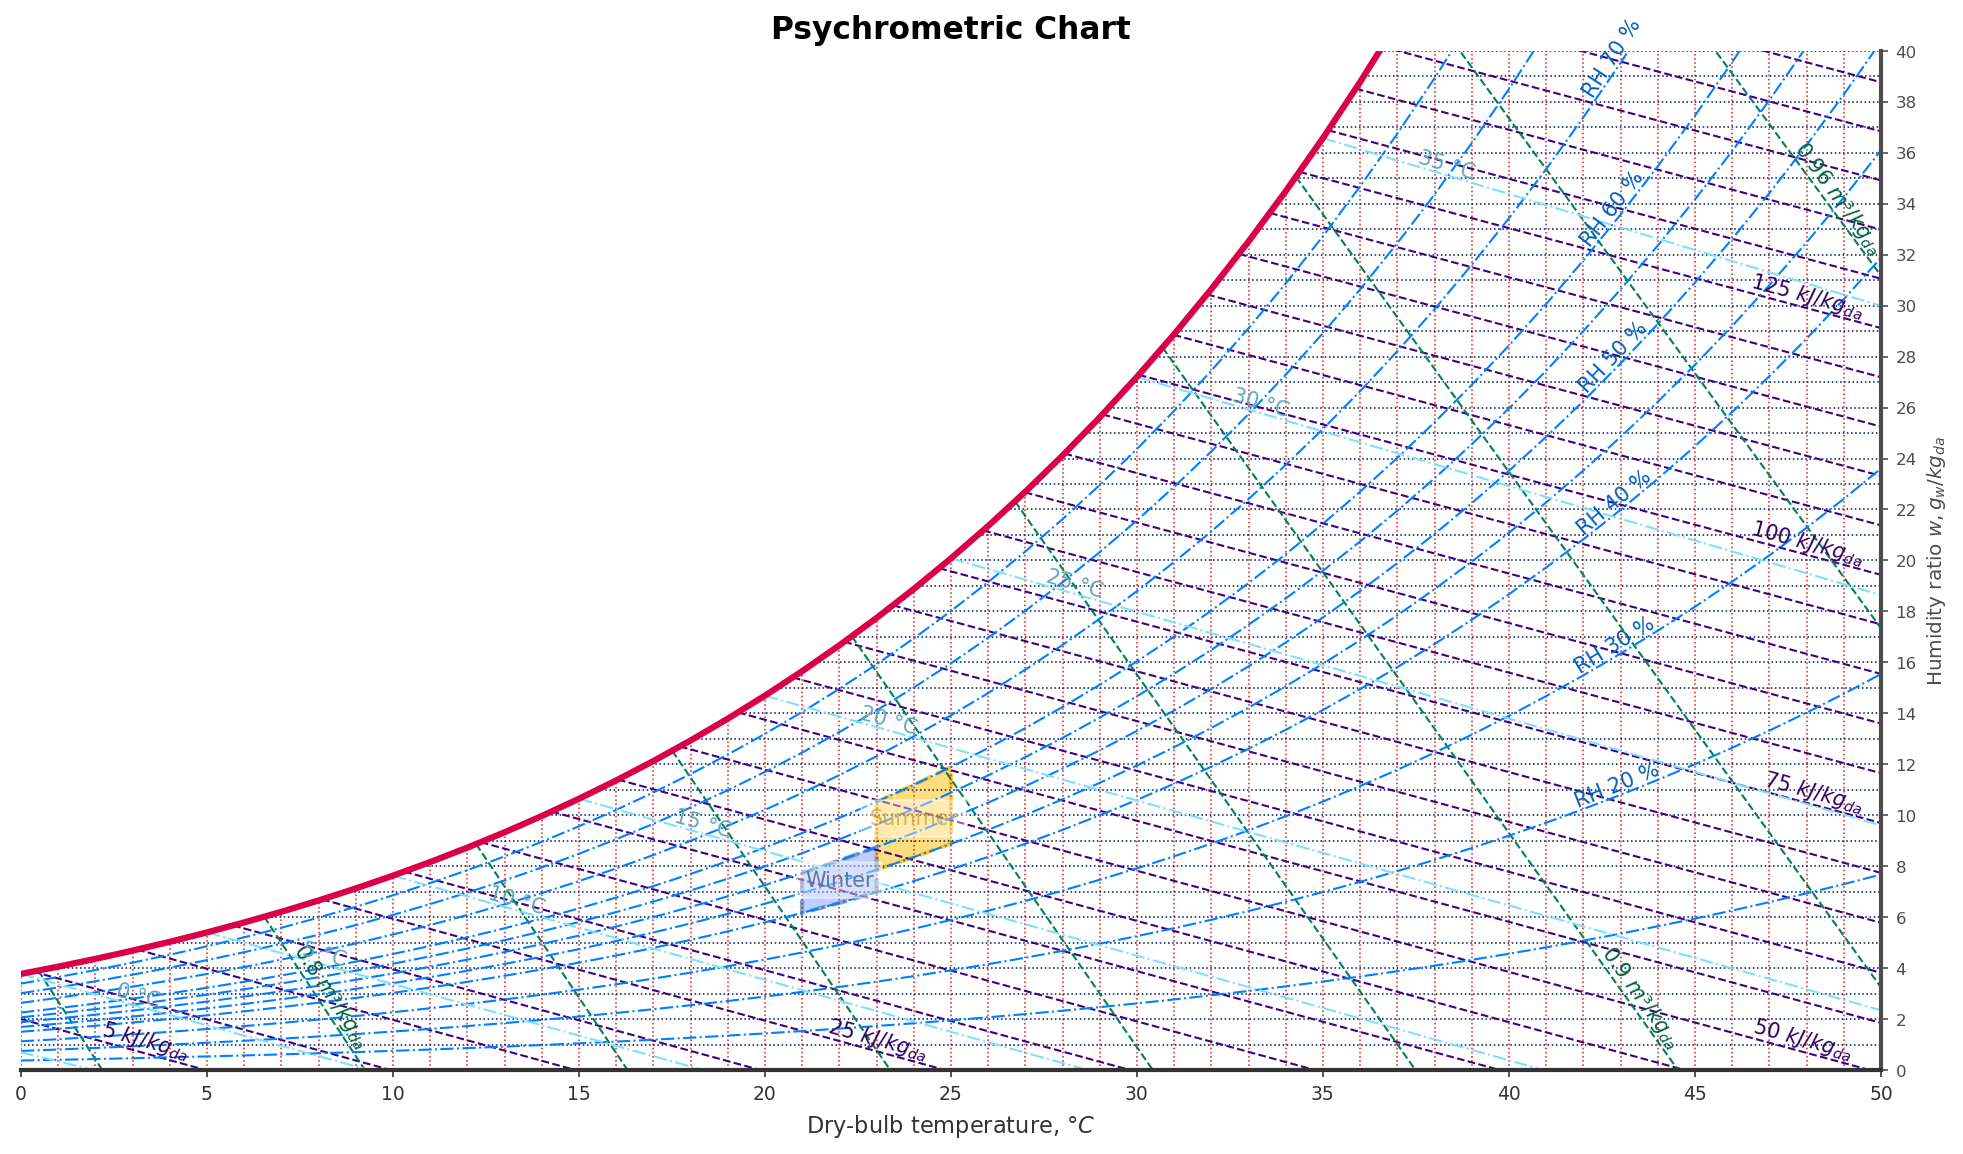

In [33]:
from psychrochart import PsychroChart

chart_default = PsychroChart('default')
ax = chart_default.plot()
ax.get_figure()

C:\Users\81803\anaconda3\lib\site-packages\psychrochart\chart.py:533: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = self.figure.gca(position=position)


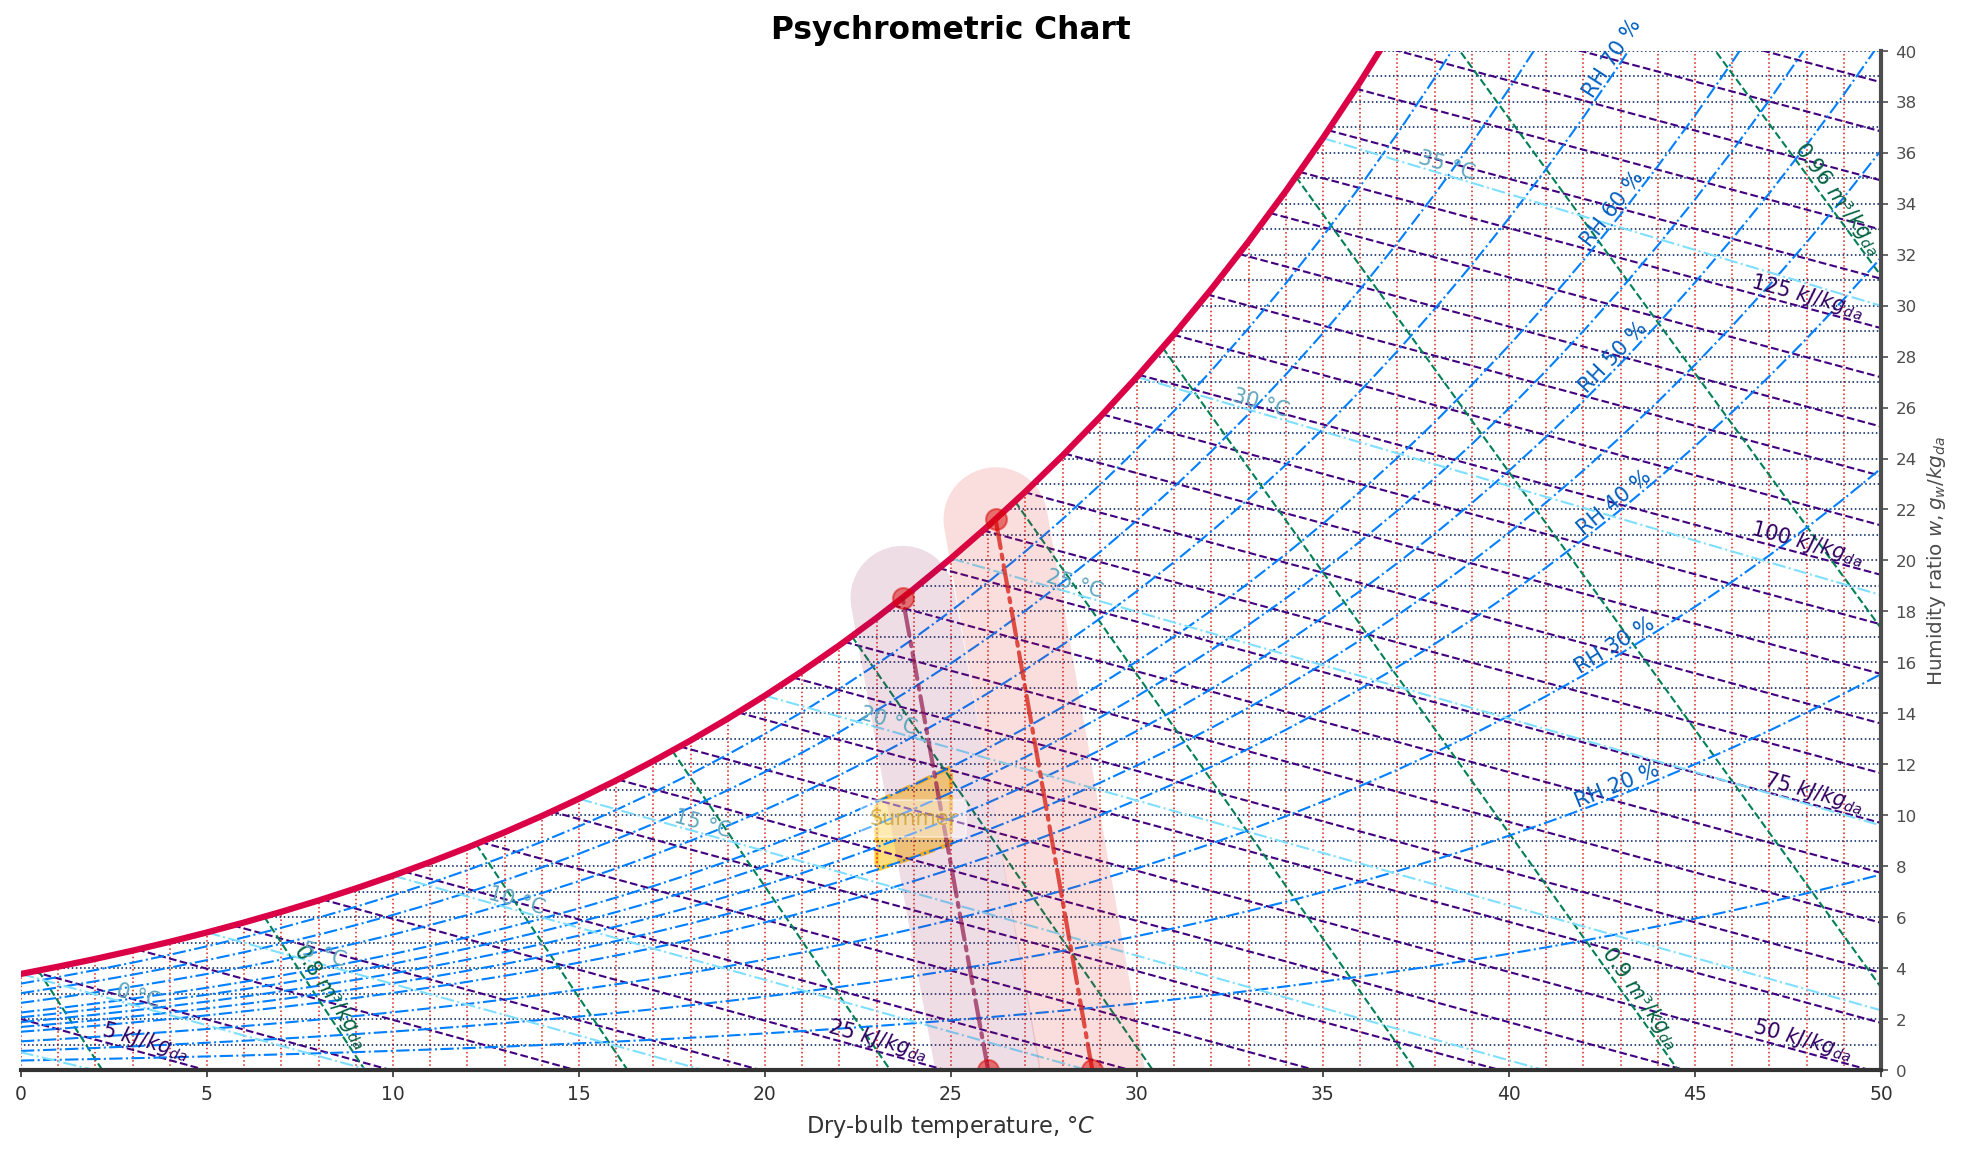

In [193]:
from psychrochart import PsychroChart
from psychrochart import load_zones
chart_default = PsychroChart('default')
from psychrochart import load_config
config_style = load_config('default')
#plotする
#領域の情報の公開
config_zone = load_zones()
# 末尾にデータを追加
#config_zone['zones'].append(config_zone['zones'][0].copy())

config_zone['zones'].pop() # リストの末尾のデータを削除

# 追加したデータの設定01(今後はこれを増やす予定)
point = {'point1': {'label': 'point1',
                       'style': {'color': [0.85, 0.0, 0.0, 0.5],
                                 'marker': 'o', 
                                 'markersize': 10},
                       'xy': (CalculateTdb(0)[0], 0)},
         'point2': {'label': 'point2',
                       'style': {'color': [0.85, 0.0, 0.0, 0.5],
                                 'marker': 'o', 
                                 'markersize': 10},
                       'xy': (CalculateTdb(0)[1], 0)},
         'point3': {'label': 'point3',
                       'style': {'color': [0.85, 0.0, 0.0, 0.5],
                                 'marker': 'o', 
                                 'markersize': 10},
                       'xy': (CalculateTdb(100)[0], 100)},
         'point4': {'label': 'point4',
                       'style': {'color': [0.85, 0.0, 0.0, 0.5],
                                 'marker': 'o', 
                                 'markersize': 10},
                       'xy': (CalculateTdb(100)[1], 100)}}
connectors = [{'start': 'point1',
               'end': 'point3',
               'label': 'Process 1',
               'style': {'color': [0.573, 0.106, 0.318, 0.7],
                         "linewidth": 2, "linestyle": "-."}},
              {'start': 'point2',
               'end': 'point4',
               'label': 'Process 2',
               'style': {'color': [0.855, 0.145, 0.114, 0.8],
                         "linewidth": 2, "linestyle": "-."}}]
#ここでチャートの描画
chart = PsychroChart(config_style, config_zone)
ax = chart.plot()
chart.plot_points_dbt_rh(point, connectors)
ax.get_figure()

In [155]:
config_zone

{'zones': [{'zone_type': 'dbt-rh',
   'style': {'edgecolor': [0.0, 0.0, 0.8, 0.8],
    'facecolor': [0.0, 0.0, 0.8, 0.5],
    'linestyle': '--',
    'linewidth': 2},
   'points_x': [0, 15],
   'points_y': [20, 40],
   'label': 'Cold'}]}

C:\Users\81803\anaconda3\lib\site-packages\psychrochart\chart.py:533: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = self.figure.gca(position=position)


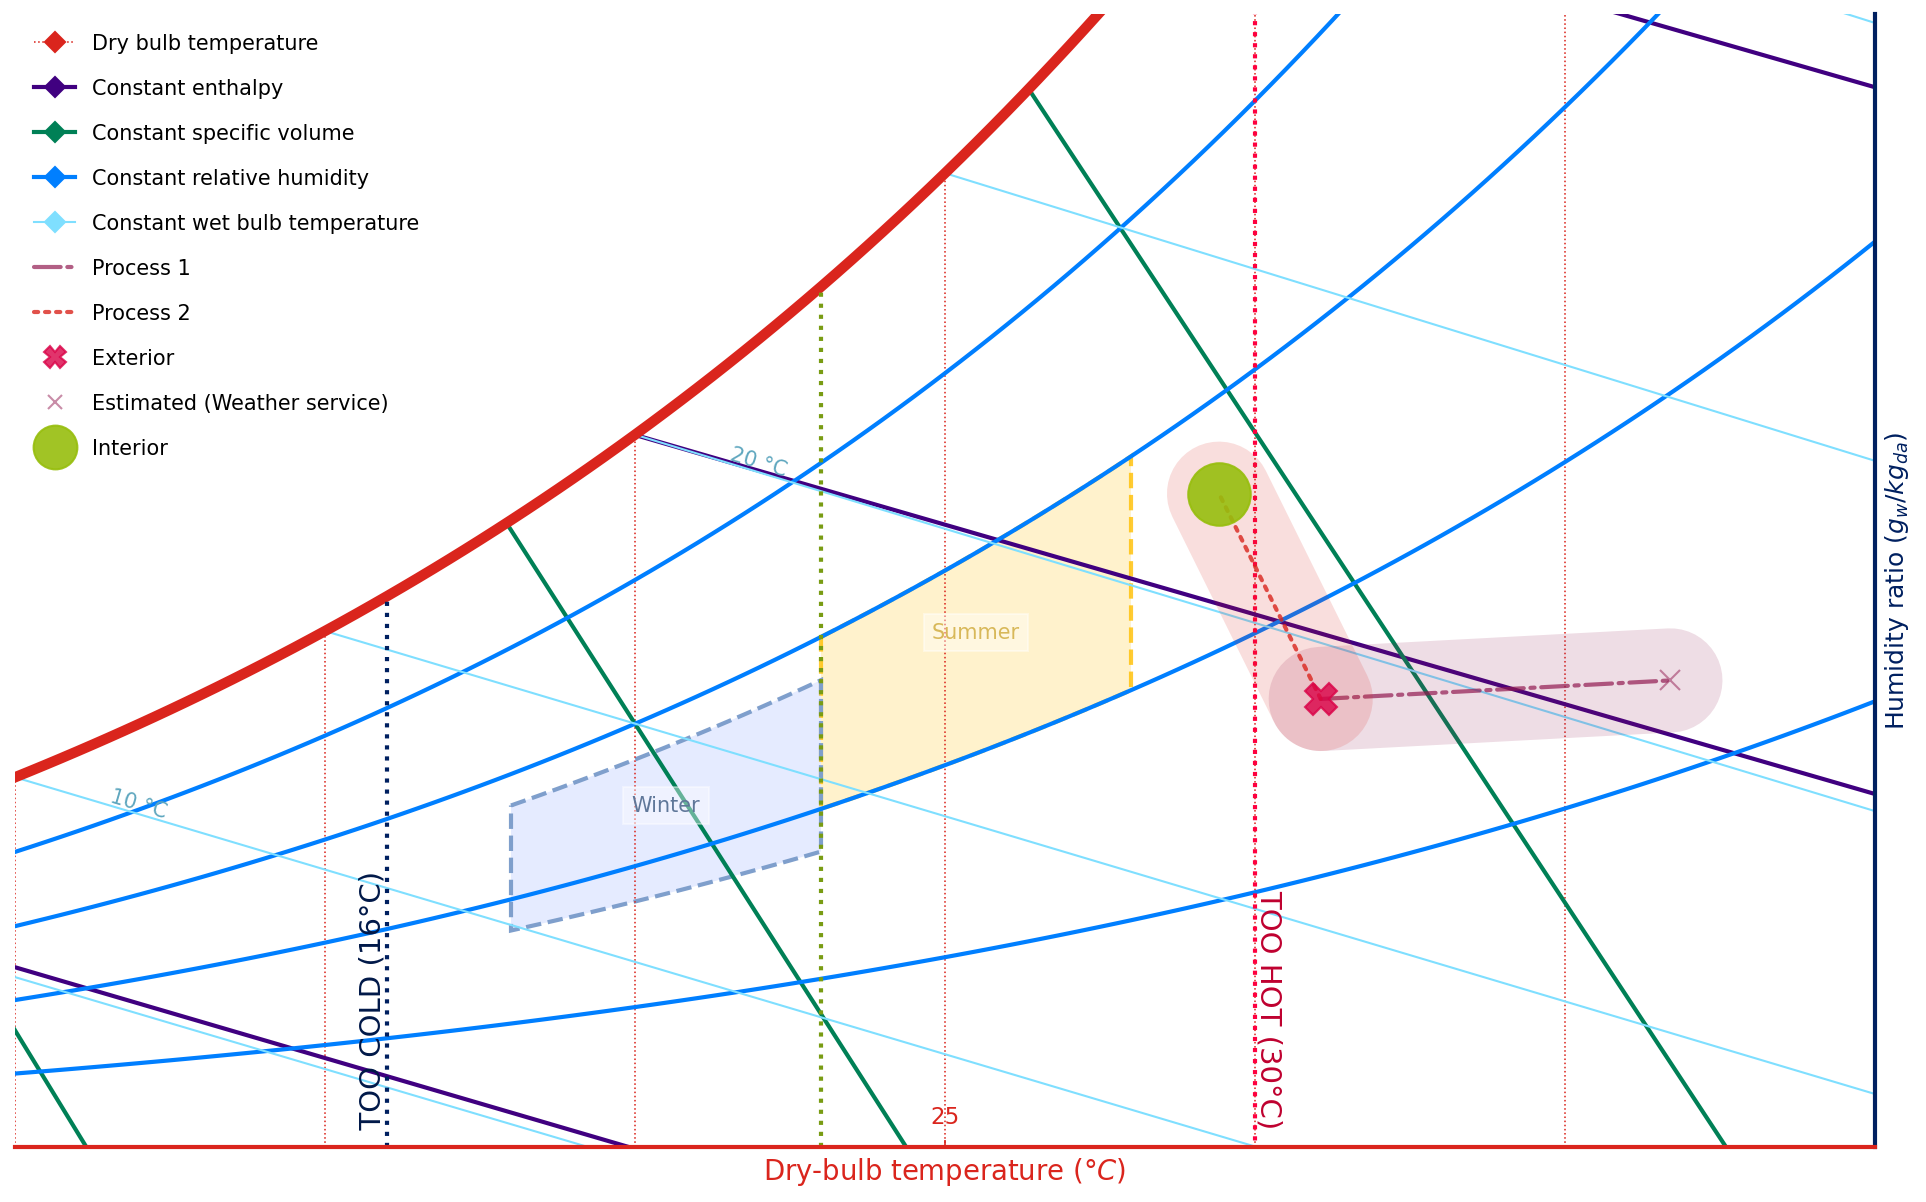

In [180]:
# Get a preconfigured chart
chart = PsychroChart("minimal")

# Append zones:
zones_conf = {
    "zones":[{
            "zone_type": "dbt-rh",
            "style": {"edgecolor": [1.0, 0.749, 0.0, 0.8],
                      "facecolor": [1.0, 0.749, 0.0, 0.2],
                      "linewidth": 2,
                      "linestyle": "--"},
            "points_x": [23, 28],
            "points_y": [40, 60],
            "label": "Summer"
        },
        {
            "zone_type": "dbt-rh",
            "style": {"edgecolor": [0.498, 0.624, 0.8],
                      "facecolor": [0.498, 0.624, 1.0, 0.2],
                      "linewidth": 2,
                      "linestyle": "--"},
            "points_x": [18, 23],
            "points_y": [35, 55],
            "label": "Winter"
        }]}
chart.append_zones(zones_conf)

# Plot the chart
ax = chart.plot()

# Add Vertical lines
t_min, t_opt, t_max = 16, 23, 30
chart.plot_vertical_dry_bulb_temp_line(
    t_min, {"color": [0.0, 0.125, 0.376], "lw": 2, "ls": ':'},
    '  TOO COLD ({}°C)'.format(t_min), ha='left', loc=0., fontsize=14)
chart.plot_vertical_dry_bulb_temp_line(
    t_opt, {"color": [0.475, 0.612, 0.075], "lw": 2, "ls": ':'})
chart.plot_vertical_dry_bulb_temp_line(
    t_max, {"color": [1.0, 0.0, 0.247], "lw": 2, "ls": ':'},
    'TOO HOT ({}°C)  '.format(t_max), ha='right', loc=1,
    reverse=True, fontsize=14)

# Add labelled points and conexions between points
points = {'exterior': {'label': 'Exterior',
                       'style': {'color': [0.855, 0.004, 0.278, 0.8],
                                 'marker': 'X', 'markersize': 15},
                       'xy': (31.06, 32.9)},
          'exterior_estimated': {
              'label': 'Estimated (Weather service)',
              'style': {'color': [0.573, 0.106, 0.318, 0.5],
                        'marker': 'x', 'markersize': 10},
              'xy': (36.7, 25.0)},
          'interior': {'label': 'Interior',
                       'style': {'color': [0.592, 0.745, 0.051, 0.9],
                                 'marker': 'o', 'markersize': 30},
                       'xy': (29.42, 52.34)}}
connectors = [{'start': 'exterior',
               'end': 'exterior_estimated',
               'label': 'Process 1',
               'style': {'color': [0.573, 0.106, 0.318, 0.7],
                         "linewidth": 2, "linestyle": "-."}},
              {'start': 'exterior',
               'end': 'interior',
               'label': 'Process 2',
               'style': {'color': [0.855, 0.145, 0.114, 0.8],
                         "linewidth": 2, "linestyle": ":"}}]
chart.plot_points_dbt_rh(points, connectors)

# Add a legend
chart.plot_legend(markerscale=.7, frameon=False, fontsize=10, labelspacing=1.2)
ax.get_figure()

In [172]:
from pythermalcomfort.models import pmv
from pythermalcomfort.utilities import v_relative, clo_dynamic
#湿度の値で、PMVが-0.5,0.5となる温度の値を算出する。
def CalculateTdb(rh):
    #tdbの値を10~40℃、0.1度刻みで行いたい。
    td1=[]
    for i in range(100,401):
        i1=i/10
        td1.append(i1)
    #rhをの値を0 PMVを算出。
    rh0=rh
    v=0.1
    met=1.0
    clo=0.5
    # calculate relative air speed
    v_r = v_relative(v=v, met=met)
    # calculate dynamic clothing
    clo_d = clo_dynamic(clo=clo, met=met)
    results0 = pmv(tdb=td1, tr=td1, vr=v_r, rh=rh0, met=met, clo=clo_d)
    Pmv0=[]
    #-0.5~0.5までの値が何番目にあるのか抽出rh=0
    for u in range(301):
        Val=results0[u]
        if Val == "nan":
            u1 = "a"
        elif -0.5<=Val<=0.5:
            u1 = u
        else:
            u1 = "a"
        Pmv0.append(u1)
    #print(Pmv0)
    Pmv0=set(Pmv0)
    Pmv0.remove("a")
    Pmv0=list(Pmv0)
    return [td1[Pmv0[0]],td1[Pmv0[-1]],rh]
#[td1[Pmv0[0]],td1[Pmv0[-1]]]

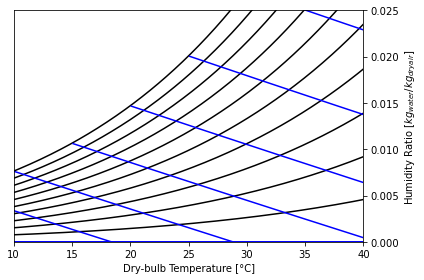

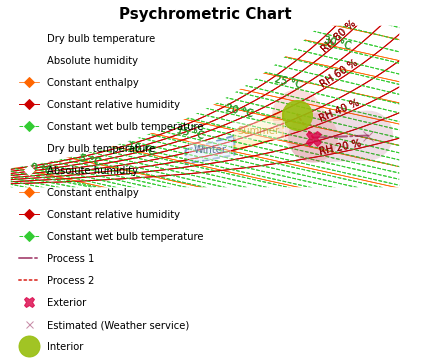

In [198]:
# plot a simple psychrometric chart
import psychrolib
import matplotlib.pyplot as plt
import numpy as np

psychrolib.SetUnitSystem(psychrolib.SI)

pressure = 101325

t_array = np.arange(5, 45, 0.1)
rh_array = np.arange(0, 1.1, 0.1)
enthalpy_array = np.arange(0, 120000, 10000)
hr_hor_lines = np.arange(0.005, 0.03, 0.005)
twb_array = np.arange(-10, 45, 5)

f, ax = plt.subplots()

# plot constant relative humidity lines
for rh in rh_array:
    hr_array = []
    for t in t_array:
        hr = psychrolib.GetHumRatioFromRelHum(t, rh, pressure)
        hr_array.append(hr)
    ax.plot(t_array, hr_array, 'k')

for twb in twb_array:
    hr_array = []
    t_plot_array = []
    for t in t_array:
        if twb <= t:
            # print(twb, t)
            hr = psychrolib.GetHumRatioFromTWetBulb(t, twb, pressure)
            hr_array.append(hr)
            t_plot_array.append(t)
    ax.plot(t_plot_array, hr_array, 'b')


ax.set(ylim=(0, 0.025), xlim=(10, 40), ylabel=r"Humidity Ratio [$kg_{water}/kg_{dry air}$]", xlabel="Dry-bulb Temperature [°C]")
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.tight_layout()
plt.show()

# ################
# Plot apsychrometric chart using psychrochart
# ################

# import matplotlib.pyplot as plt
# import numpy as np
# from psychrochart import PsychroChart

# # Pass a dict with the changes wanted:
# custom_style = {
#     "figure": {
#         # "title": "Psychrometric Chart (sea level)",
#         "x_label": "DRY-BULB TEMPERATURE, $°C$",
#         "y_label": "HUMIDITY RATIO $w, g_w / kg_{da}$",
#         "x_axis": {"color": [1.0, 1.0, 1.0], "linewidth": 1.5, "linestyle": "-"},
#         "x_axis_labels": {"color": [1.0, 1.0, 1.0], "fontsize": 8},
#         "x_axis_ticks": {"direction": "out", "color": [1.0, 1.0, 1.0]},
#         "y_axis": {"color": [1.0, 1.0, 1.0], "linewidth": 1.5, "linestyle": "-"},
#         "y_axis_labels": {"color": [1.0, 1.0, 1.0], "fontsize": 8},
#         "y_axis_ticks": {"direction": "out", "color": [1.0, 1.0, 1.0]},
#         "partial_axis": False,
#         "position": [0.025, 0.075, 0.925, 0.875]
#         },
#     "limits": {
#         "range_temp_c": [0, 40],
#         "range_humidity_g_kg": [0, 30],
#         "altitude_m": 0,
#         "step_temp": 1.0
#         },
#     "saturation": {"color": [1.0, 1.0, 1.0], "linewidth": 2, "linestyle": "-"},
#     "constant_rh": {"color": [0.8, 0.0, 0.0], "linewidth": 1, "linestyle": "-"},
#     "constant_v": {"color": [0.0, 0.4, 0.4], "linewidth": 0.5, "linestyle": "-"},
#     "constant_h": {"color": [1, 0.4, 0.0], "linewidth": 0.75, "linestyle": "-"},
#     "constant_wet_temp": {"color": [0.2, 0.8, 0.2], "linewidth": 1, "linestyle": "--"},
#     "constant_dry_temp": {"color": [1.0, 1.0, 1.0], "linewidth": 0.25, "linestyle": "-"},
#     "constant_humidity": {"color": [1.0, 1.0, 1.0], "linewidth": 0.25, "linestyle": "-"},
#     "chart_params": {
#         "with_constant_rh": True,
#         "constant_rh_curves": [20, 30, 40, 50, 60, 70, 80, 90],
#         "constant_rh_labels": [20, 40, 60, 80],
#         "with_constant_v": False,
#         "constant_v_step": 0.01,
#         "range_vol_m3_kg": [0.78, 0.96],
#         "with_constant_h": True,
#         "constant_h_step": 10,
#         "constant_h_labels": [0],
#         "range_h": [10, 130],
#         "with_constant_wet_temp": True,
#         "constant_wet_temp_step": 1,
#         "range_wet_temp": [-10, 35],
#         "constant_wet_temp_labels": [0, 5, 10, 15, 20, 25, 30],
#         "with_constant_dry_temp": True,
#         "constant_temp_step": 5,

#         "with_constant_humidity": True,
#         "constant_humid_step": 2,

#         "with_zones": False
#         }
#     }

# fig, ax = plt.subplots(figsize=(7, 3))
# chart = PsychroChart(custom_style)
# chart.plot(ax)

# # Append zones:
# zones_conf = {
#     "zones":[{
#             "zone_type": "dbt-rh",
#             "style": {"edgecolor": [1.0, 0.749, 0.0, 0.8],
#                       "facecolor": [1.0, 0.749, 0.0, 0.2],
#                       "linewidth": 2,
#                       "linestyle": "--"},
#             "points_x": [23, 28],
#             "points_y": [40, 60],
#             "label": "Summer"
#         },
#         {
#             "zone_type": "dbt-rh",
#             "style": {"edgecolor": [0.498, 0.624, 0.8],
#                       "facecolor": [0.498, 0.624, 1.0, 0.2],
#                       "linewidth": 2,
#                       "linestyle": "--"},
#             "points_x": [18, 23],
#             "points_y": [35, 55],
#             "label": "Winter"
#         }]}
# chart.append_zones(zones_conf)

chart.plot(ax)

# # Add Vertical lines
# t_min, t_opt, t_max = 16, 23, 30
# chart.plot_vertical_dry_bulb_temp_line(
#     t_min, {"color": [0.0, 0.125, 0.376], "lw": 2, "ls": ':'},
#     '  TOO COLD ({}°C)'.format(t_min), ha='left', loc=0., fontsize=14)
# chart.plot_vertical_dry_bulb_temp_line(
#     t_opt, {"color": [0.475, 0.612, 0.075], "lw": 2, "ls": ':'})
# chart.plot_vertical_dry_bulb_temp_line(
#     t_max, {"color": [1.0, 0.0, 0.247], "lw": 2, "ls": ':'},
#     'TOO HOT ({}°C)  '.format(t_max), ha='right', loc=1,
#     reverse=True, fontsize=14)
#
# Add labelled points and connections between points
# points = {'exterior': {'label': 'Exterior',
#                        'style': {'color': [0.855, 0.004, 0.278, 0.8],
#                                  'marker': 'X', 'markersize': 15},
#                        'xy': (31.06, 32.9)},
#           'exterior_estimated': {
#               'label': 'Estimated (Weather service)',
#               'style': {'color': [0.573, 0.106, 0.318, 0.5],
#                         'marker': 'x', 'markersize': 10},
#               'xy': (36.7, 25.0)},
#           'interior': {'label': 'Interior',
#                        'style': {'color': [0.592, 0.745, 0.051, 0.9],
#                                  'marker': 'o', 'markersize': 30},
#                        'xy': (29.42, 52.34)}}
# connectors = [{'start': 'exterior',
#                'end': 'exterior_estimated',
#                'label': 'Process 1',
#                'style': {'color': [0.573, 0.106, 0.318, 0.7],
#                          "linewidth": 2, "linestyle": "-."}},
#               {'start': 'exterior',
#                'end': 'interior',
#                'label': 'Process 2',
#                'style': {'color': [0.855, 0.145, 0.114, 0.8],
#                          "linewidth": 2, "linestyle": ":"}}]
# chart.plot_points_dbt_rh(points, connectors)
# #
# chart.plot_legend(markerscale=.7, frameon=False, fontsize=10, labelspacing=1.2)

# import pandas as pd
# import psychrolib
# import seaborn as sns

# df = pd.read_csv(r"C:\Users\Federico\Downloads/epw.csv")
# pressure = 101325
# hr = []
# for ix, row in df.iterrows():
#     hr.append(
#         psychrolib.GetHumRatioFromRelHum(row["DBT"], row["RH"] / 100, pressure) * 1000)
# df["HR"] = hr
# # plt.scatter(x=df["DPT"], y=df["HR"] c=df["glob_hor_rad"])
# # sns.kdeplot(
# #     data=df, x="DBT", y="HR", fill=True, ax=ax
# # )
# sns.histplot(df, x="DBT", y="HR", ax=ax)

# t_array = np.arange(0, 50, 0.1)
# lower_hr = [psychrolib.GetHumRatioFromRelHum(x, 1, pressure) * 1000 for x in t_array]
# ax.fill_between(t_array, lower_hr, 100, color=(0.4, 0.4, 0.4))
# plt.show()


#plt.savefig(r"C:/Users/Federico/Downloads/test.svg", transparent=True)